In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
data = pd.read_csv('digit-recognizer/train.csv')
data_test = pd.read_csv('digit-recognizer/test.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = data_test['label']
X = data_test.drop(['label'],axis=1)

m,n = X.shape

Y = np.array(Y)
X = np.array(X)


X = X.T
X.shape

In [ ]:
indices = np.random.permutation(len(Y))

X = X[:,indices]
Y = Y[indices]

In [ ]:
W1 = np.random.randn(10, n) * np.sqrt(2 / n)
B1 = np.random.randn(10,1) * np.sqrt(2 / 10)
W2 = np.random.randn(10,10) * np.sqrt(2 / 10)
B2 = np.random.randn(10,1) * np.sqrt(2 / 10)
W3 = np.random.randn(10,10) * np.sqrt(2 / 10)
B3 = np.random.randn(10,1) * np.sqrt(2 / 10)

In [ ]:
weights = np.load("Model_weights.npz")

W1 = weights['W1']
W2 = weights['W2']
W3 = weights['W3']
B1 = weights['B1']
B2 = weights['B2']
B3 = weights['B3']

In [ ]:
def relu(x):
    return np.maximum(x,0)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=0, keepdims=True)) 
    return exp_x / np.sum(exp_x, axis=0, keepdims=True)  
    
def deriv_relu(x):
    return (x > 0).astype(int)

In [ ]:
def train_test_split(x, y, test_size=0.2):
    num = int((1 - test_size) * m)
    x_train = x[:, :num]
    y_train = y[:num]
    x_test = x[:, num:]
    y_test = y[num:]
    
    return x_train, y_train, x_test, y_test

def one_hot_enc(y, classes=10):
    one_hot = np.zeros((y.size, classes))
    one_hot[np.arange(y.size), y] = 1
    
    return one_hot

In [ ]:
def fwd_prop(x, W1, B1, W2, B2, W3, B3):
    
    Z1 = np.dot(W1,x) + B1
    A1 = relu(Z1)
    Z2 = np.dot(W2,A1) + B2
    A2 = relu(Z2)
    Z3 = np.dot(W3,A2) + B3
    A3 = softmax(Z3)
    
    return Z1, A1, Z2, A2, Z3, A3


def back_prop(x, y, Z1, A1, Z2, A2, Z3, A3, b_s=1):
    dZ3 = A3 - y
    dW3 = np.dot(dZ3,A2.T) / b_s 
    dB3 = np.sum(dZ3, axis=1, keepdims=True) / b_s
    dA2 = np.dot(W3.T,dZ3)
    dZ2 = dA2 * deriv_relu(Z2) 
    dW2 = np.dot(dZ2, A1.T) / b_s
    dB2 = np.sum(dZ2, axis=1, keepdims=True) / b_s

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * deriv_relu(Z1)
    dW1 = np.dot(dZ1, x.T) / b_s
    dB1 = np.sum(dZ1, axis=1, keepdims=True) / b_s
     
    return dW3, dB3, dW2, dB2, dW1, dB1

In [31]:
X_train, Y_train, X_test, Y_test = train_test_split(X, Y, test_size=0.01)
batch_size = 10
eta = 0.00001
eta_decay = 0.995
Y_train.shape

(41580,)

In [32]:
for epoch in range(300):
    for i in range(0, X_train.shape[1], batch_size):
       
        X_batch = X_train[:,i:i+batch_size]
        Y_target = one_hot_enc(Y_train[i:i+batch_size]).T
    
    
        Z1, A1, Z2, A2, Z3, A3 = fwd_prop(X_batch, W1, B1, W2, B2, W3, B3)
        dW3, dB3, dW2, dB2, dW1, dB1 = back_prop(X_batch, Y_target, Z1, A1, Z2, A2, Z3, A3, b_s=10)

        loss = -np.mean(Y_target * np.log(A3 + 1e-8)

        W1 -= eta*dW1
        W2 -= eta*dW2
        W3 -= eta*dW3
        B1 -= eta*dB1
        B2 -= eta*dB2
        B3 -= eta*dB3

    if epoch%20 == 0 :
        print(f'Epoch {epoch+1}/{300}, Loss: {loss:.4f}')

    if epoch > 700:
        eta *= eta_decay


Epoch 1/300, Loss: 0.0192
Epoch 21/300, Loss: 0.0190
Epoch 41/300, Loss: 0.0189
Epoch 61/300, Loss: 0.0189
Epoch 81/300, Loss: 0.0189
Epoch 101/300, Loss: 0.0187
Epoch 121/300, Loss: 0.0186
Epoch 141/300, Loss: 0.0185
Epoch 161/300, Loss: 0.0186
Epoch 181/300, Loss: 0.0185
Epoch 201/300, Loss: 0.0185


KeyboardInterrupt: 

In [42]:
np.savez("Model_weights.npz", W1=W1, W2=W2,W3=W3, B1=B1, B2=B2, B3=B3)

In [38]:
total_loss = 0
for i in range(0, X_test.shape[1]):

    X_batch_test = X_test[:,i].reshape(-1,1)
    Y_targ = one_hot_enc(Y_test[i]).T

    Z1, A1, Z2, A2, Z3, Y_predict = fwd_prop(X_batch_test, W1, B1, W2, B2, W3, B3)
    test_loss = -np.mean(Y_targ * np.log(Y_predict + 1e-8)

    if i % 100 == 0:
        print(f'Epoch {i+1}, Loss {training_loss}')
    total_loss += training_loss

avg_loss = total_loss / X_test.shape[1]
print(f'Average loss = {avg_loss}')

Epoch 1, Loss 0.0012624173208445263
Epoch 101, Loss 0.007146125419984812
Epoch 201, Loss 1.0412350191243322e-08
Epoch 301, Loss 0.12734246113693654
Epoch 401, Loss 0.0037067089015519424
Average loss = 0.05032531095504622


In [33]:
import cv2

In [34]:
data_test.shape

(28000, 784)

In [39]:
def predict_number(image, W1, B1, W2, B2, W3, B3):

    _, _, _, _, _, Y_pred = fwd_prop(image, W1, B1, W2, B2, W3, B3)

    prediction = np.argmax(Y_pred)

    plt.imshow(image.reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.text(14, 30, f"Prediction = {prediction}", fontsize=12, ha='center')
    plt.show()



    return prediction

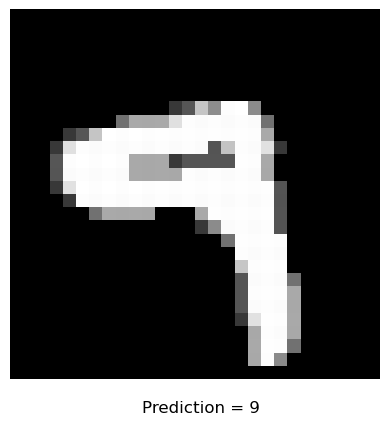

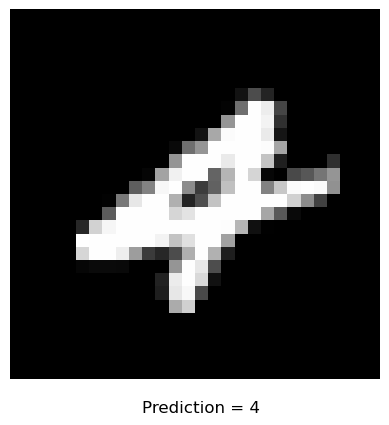

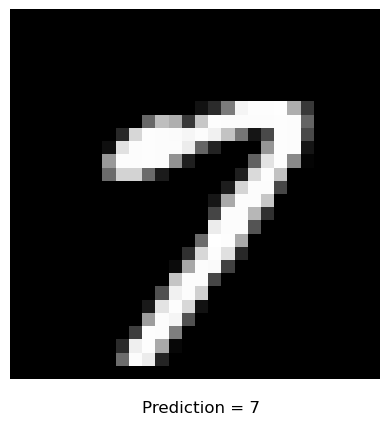

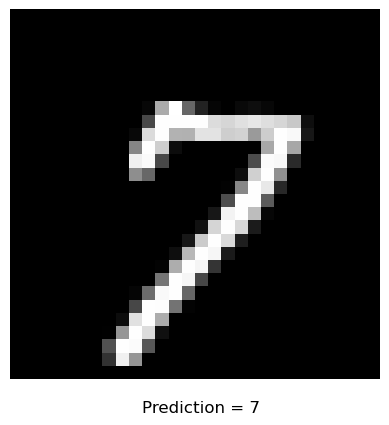

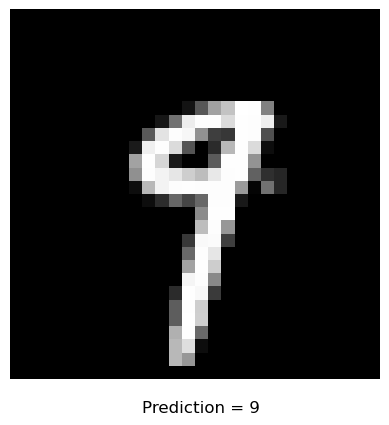

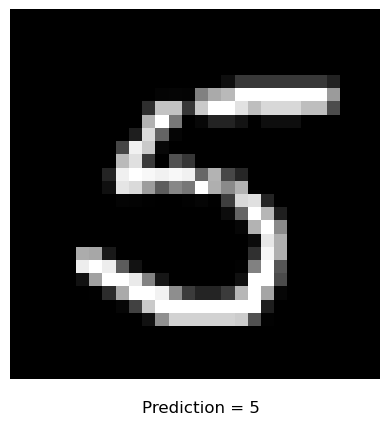

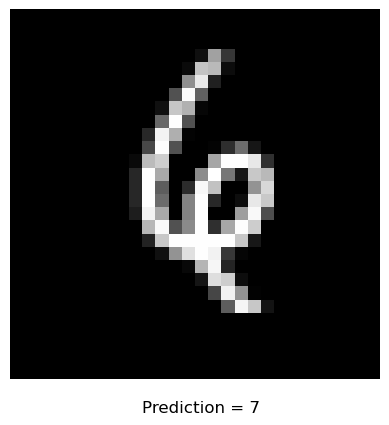

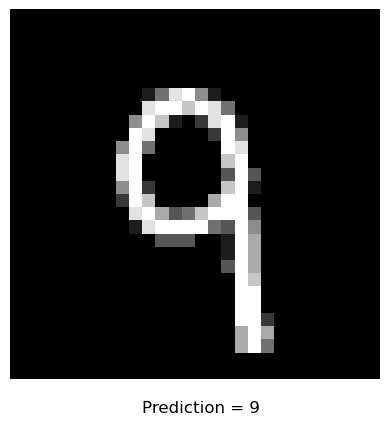

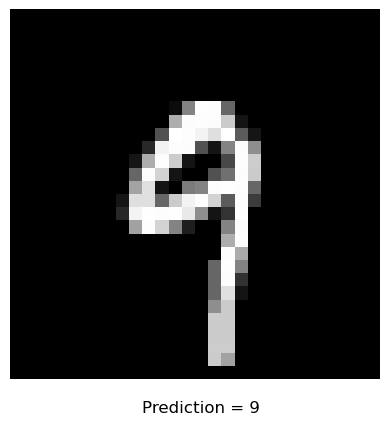

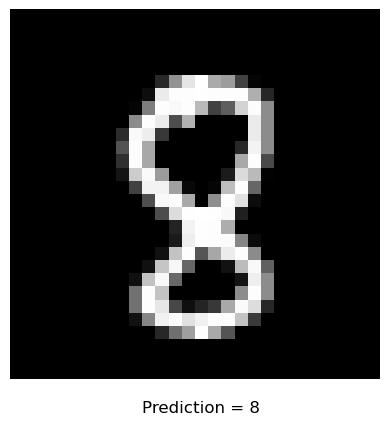

In [41]:
for i in range(0, 10):
    
    rand = np.random.randint(0,28000)
    image_used = data_test.iloc[rand,:].values.reshape(-1,1)
    imag = image_used.reshape(28,28)

    predict_number(image_used, W1, B1, W2, B2, W3, B3)

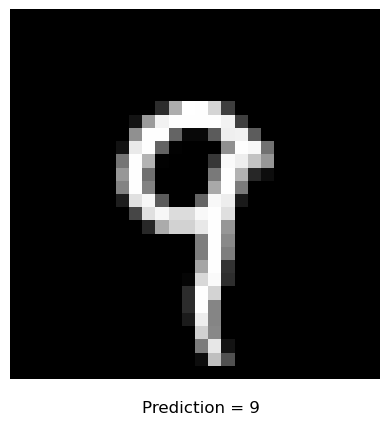

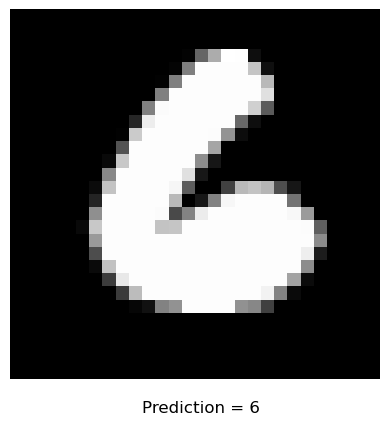

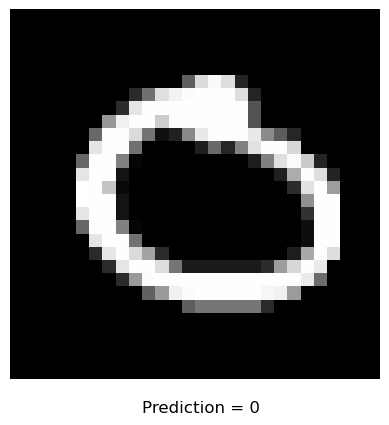

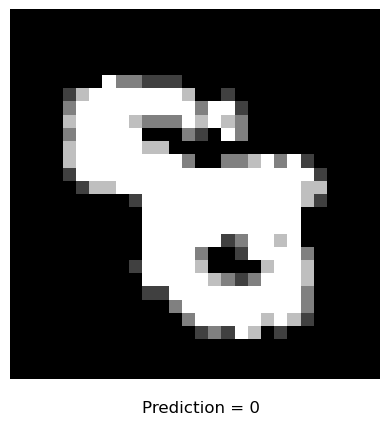

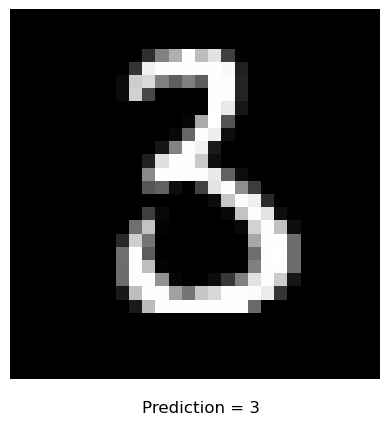

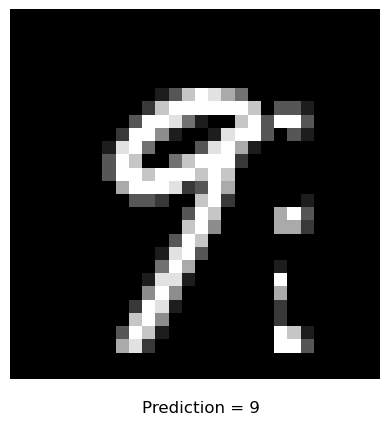

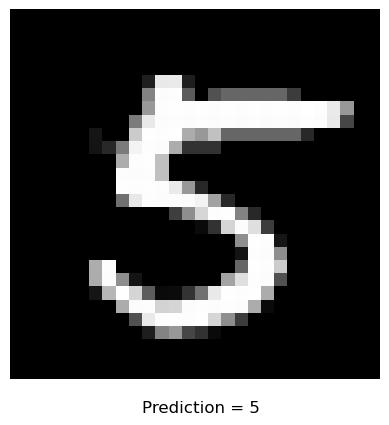

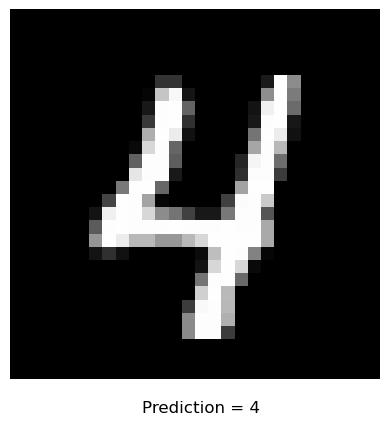

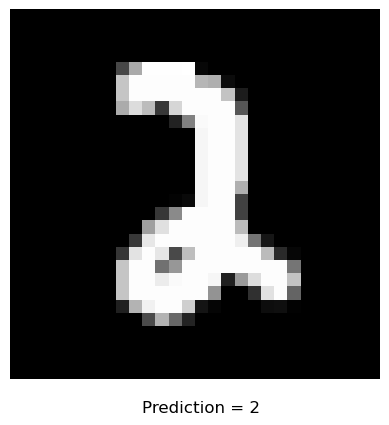

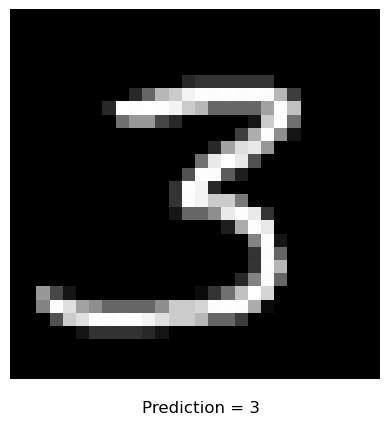

In [21]:
for i in range(0, 10):
    
    rand = np.random.randint(0,42000)
    image_used = data.drop(['label'],axis=1).iloc[rand,:].values.reshape(-1,1)
    imag = image_used.reshape(28,28)
    label = data['label'].iloc[rand]

    predict_number(image_used, W1, B1, W2, B2, W3, B3)